In [1]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
  
# load the data set 
traindata = pd.read_csv('E:\\M. Fahad Habib\\8th Semester\\DWM\Lab\\kepler-labelled-time-series-data\\exoTrain.csv') 
trainarray = traindata.values
testdata = pd.read_csv('E:\\M. Fahad Habib\\8th Semester\\DWM\Lab\\kepler-labelled-time-series-data\\exoTest.csv') 
testarray = testdata.values

train_X = trainarray[:, 1:3198] 
#print(train_X)
#print(train_X.shape)
train_Y = trainarray[:,0] 
#print(train_Y)
#print(train_Y.shape)
test_X = testarray[:,1:3198] 
#print(test_X)
#print(test_X.shape)
test_Y = testarray[:,0] 
#print(test_Y)
#print(test_Y.shape)

#Normalizing
from sklearn import preprocessing
train_X = preprocessing.normalize(train_X)
test_X = preprocessing.normalize(test_X)


#Applying NearMiss Algo 
print("Before Undersampling, counts of label '1': {}".format(sum(train_Y == 1))) 
print("Before Undersampling, counts of label '2': {} \n".format(sum(train_Y == 2))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(train_X, train_Y.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '2': {}".format(sum(y_train_miss == 2))) 


Before Undersampling, counts of label '1': 5050
Before Undersampling, counts of label '2': 37 

After Undersampling, the shape of train_X: (74, 3197)
After Undersampling, the shape of train_y: (74,) 

After Undersampling, counts of label '1': 37
After Undersampling, counts of label '2': 37


# As it can be seen above, the number of columns in the undersampled dataset is 3197 and plotting histograms against all these attributes is not feasible. Therefore, we have truncated the attributes to 10 and plotted the visualizations accordingly.

In [2]:
arr1 = np.array(y_train_miss)
arr2 = np.array(X_train_miss[:, 1:11])
print (np.shape(arr1))
print (np.shape(arr2))
arr3 = np.column_stack([arr1, arr2])
print (arr3)
data_miss = pd.DataFrame(data = arr3, columns= ["LABEL", "FLUX.1", "FLUX.2", "FLUX.3", "FLUX.4","FLUX.5", "FLUX.6","FLUX.7", "FLUX.8", "FLUX.9", "FLUX.10"])
print(data_miss)
        

(74,)
(74, 10)
[[ 1.00000000e+00  3.44588440e-03  4.44933358e-03  5.28720496e-03
   5.61662448e-03  6.48162198e-03  6.60748714e-03  7.44948169e-03
   7.95467842e-03  8.73005124e-03  8.93903082e-03]
 [ 1.00000000e+00 -1.79043188e-02 -1.77415426e-02 -1.71811857e-02
  -1.61608478e-02 -1.52125379e-02 -1.44694367e-02 -1.38662909e-02
  -1.33162747e-02 -1.17903141e-02 -1.13615333e-02]
 [ 1.00000000e+00 -1.65693221e-02 -1.59131851e-02 -1.49309180e-02
  -1.40522252e-02 -1.32650795e-02 -1.23215782e-02 -1.17655367e-02
  -1.11941876e-02 -1.02815996e-02 -9.52377683e-03]
 [ 1.00000000e+00  5.36038047e-03  5.66291855e-03  5.74336259e-03
   6.11669143e-03  6.42696583e-03  6.71211430e-03  6.70376181e-03
   6.60496968e-03  7.27351105e-03  7.07133976e-03]
 [ 1.00000000e+00 -1.34380181e-03 -1.80704038e-03 -2.03251048e-03
  -1.84065592e-03 -6.87888784e-04  5.41128245e-05  8.23170845e-04
   1.14866768e-03 -2.86961948e-05 -1.49384191e-03]
 [ 1.00000000e+00  4.87452807e-03  5.11795813e-03  5.97045723e-03
   6

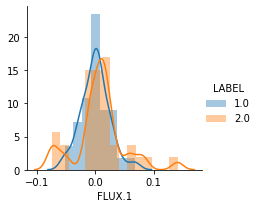

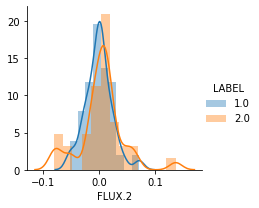

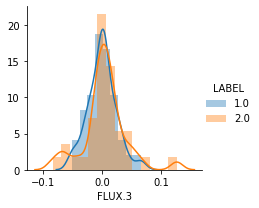

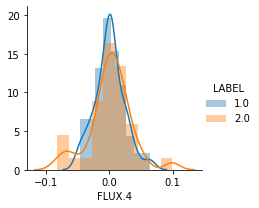

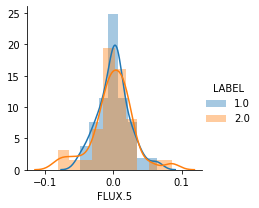

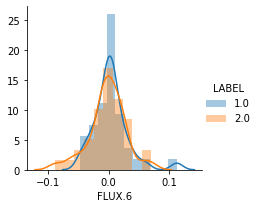

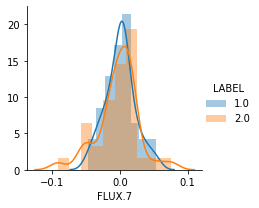

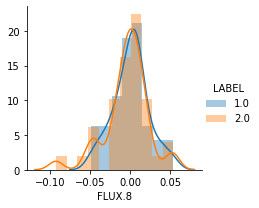

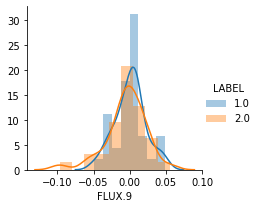

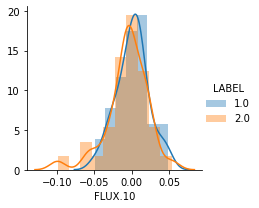

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
for x in range(1,11):
    sns.FacetGrid(data_miss, hue="LABEL") \
    .map(sns.distplot, "FLUX."+str(x)) \
    .add_legend();
    plt.show();

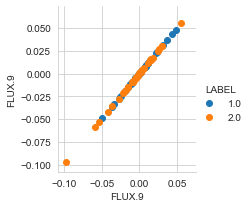

In [4]:
sns.set_style("whitegrid");
sns.FacetGrid(data_miss, hue="LABEL") \
.map(plt.scatter, "FLUX.9", "FLUX.9") \
.add_legend();
plt.show();

F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


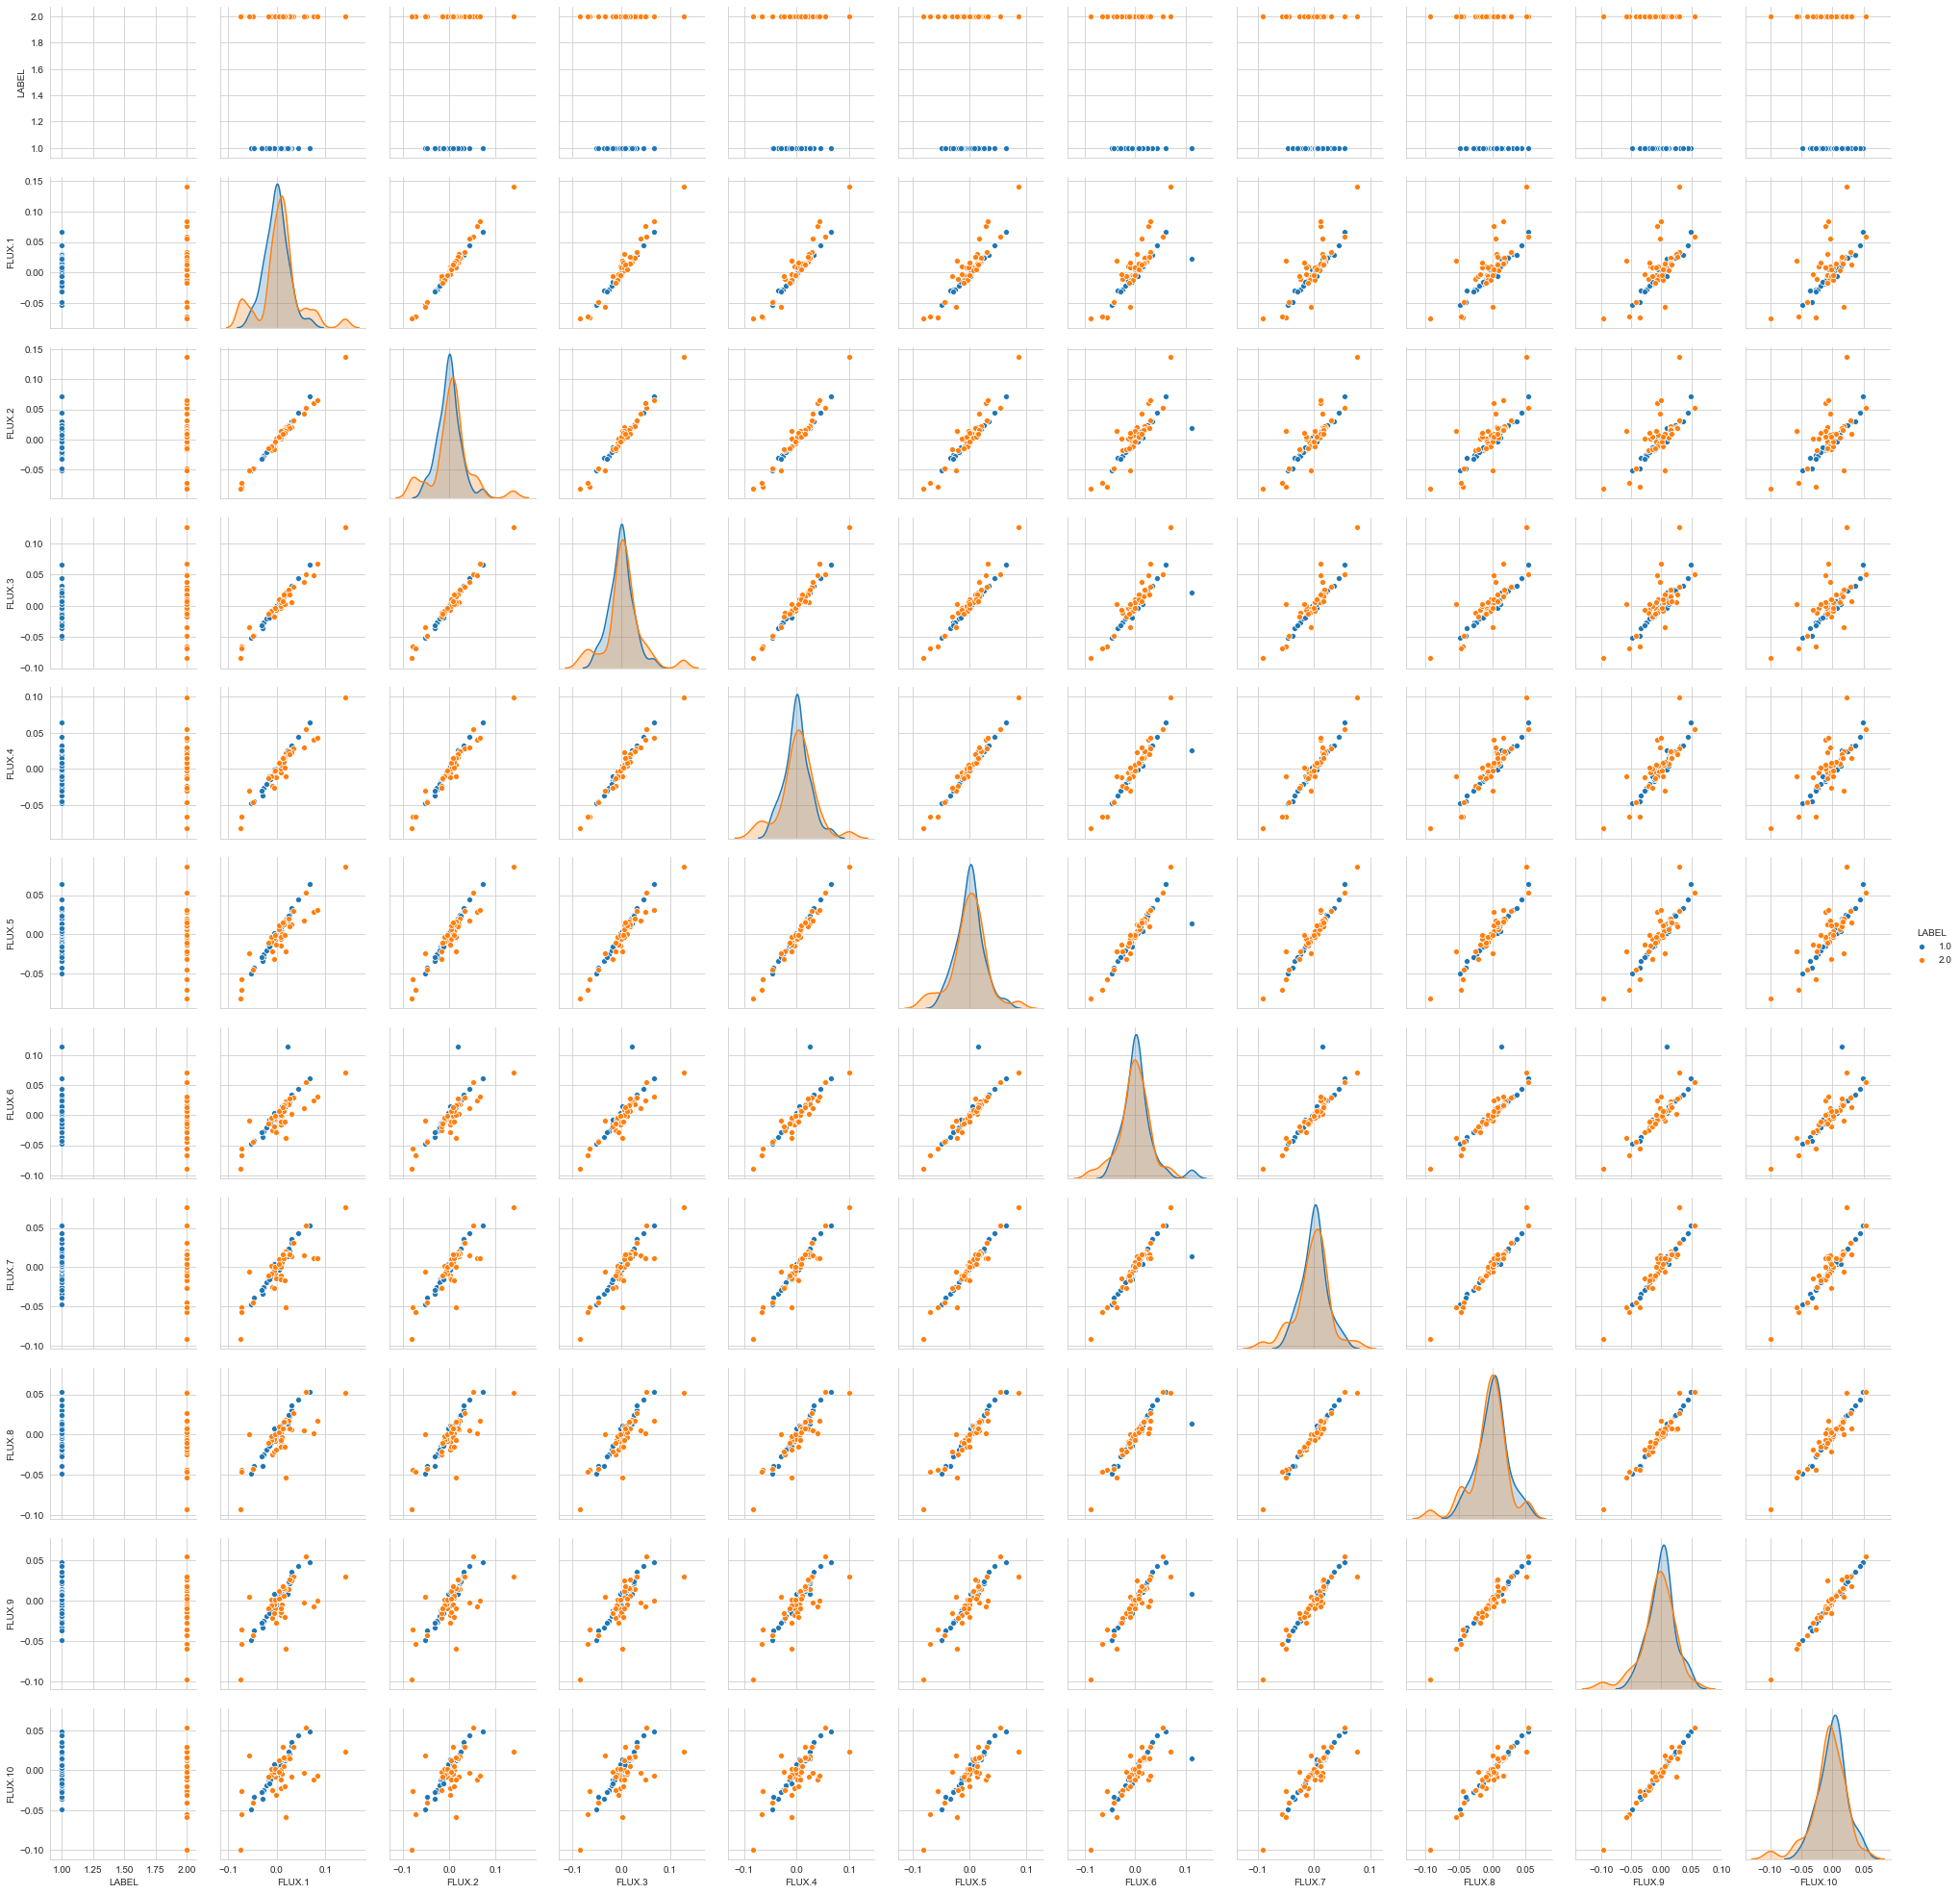

In [5]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data_miss, hue="LABEL");
plt.show()

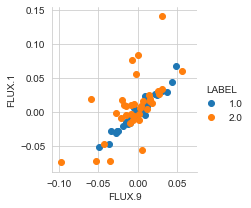

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(data_miss, hue="LABEL") \
.map(plt.scatter, "FLUX.9", "FLUX.1") \
.add_legend();
plt.show();

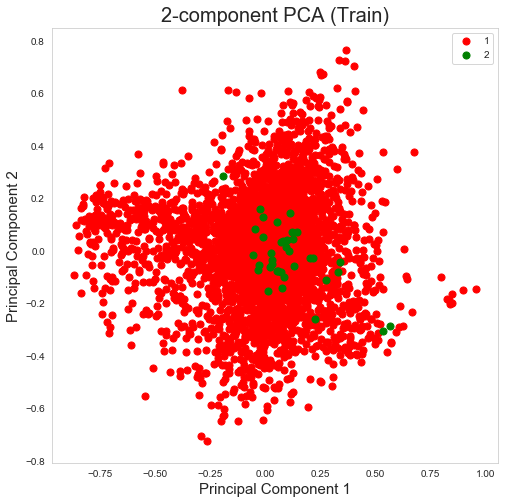

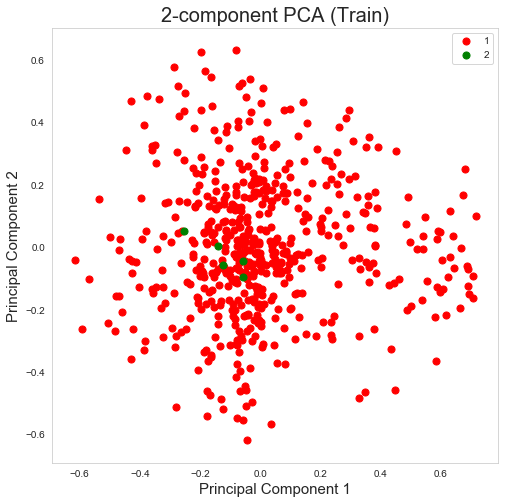

In [7]:
#Principal Component Analysis on Train Dataset and Test Dataset (Original Ones)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#For Train Set

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([principalDf, traindata["LABEL"]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA (Train)', fontsize = 20)
targets = [1, 2]
# 1:- Non Exoplanet
# 2:- Exoplanet
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LABEL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#For Test Set

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(test_X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([principalDf, testdata["LABEL"]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA (Test)', fontsize = 20)
targets = [1, 2]
# 1:- Non Exoplanet
# 2:- Exoplanet
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LABEL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

                


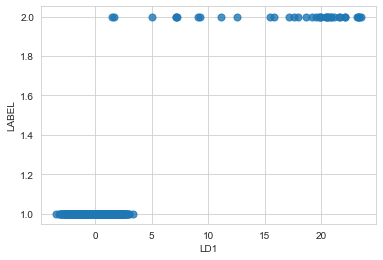

In [8]:
#LDA on training data to generate a single component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

lda = LDA(n_components=1)
X_train = lda.fit_transform(train_X, train_Y)


arr = np.column_stack([train_Y,X_train])


newdf =  pd.DataFrame(data = arr, columns= ["LABEL", "LD1"])
sns.regplot(data = newdf[["LABEL","LD1"]], x = "LD1",y = "LABEL", fit_reg=False,scatter_kws = {'s':50}, )


Conclusion: LDA was able to extract a single feature that could differentiate between the two LABELS with good accuracy.